<a href="https://colab.research.google.com/github/AprendaPracticando/AnaliticaPythonR1/blob/main/LABS/LAB_13_01_Atipicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LAB 13.01: Tratamiento de datos atípicos**


### ***Regla de Tuckey***

Una de las formas más comunes de identificar a los datos atípicos, es calculando el mínimo no atípico y el máximo no atípico, conocidos también como *límite superior* (**`Ls`**) y *límite inferior* (**`Li`**), a lo que se conoce como la *regla de Tukey*.

El límite inferior (Li) es el resultado de restarle 1.5 veces el rango intercuartílico (RIC) al primer cuartíl (Q1).

```
Li=Q1-(1.5*RIC)
```

El límite superior (Ls) es el resultado de restarle 1.5 veces el rango intercuartílico (RIC) al tercer cuartíl (Q3).

```
Ls=Q3+(1.5*RIC)
```

Cualquier número por debajo del mínimo no atípico (Li), o por encima del máximo no atípico (Ls), es un dato atípico.
En ocasiones incluso entre los datos atípicos hay niveles. Hay ocasiones en que ciertos atípicos son demasiado atípicos; en ese supuesto, se amplía el rango de discriminación. Si en lugar de multiplicar por 1.5 el rango intercuartílico se multiplica por 3.0, estaríamos hablando de que nos preparamos para encontrar un dato atípico extremo.

Un buen informe de analítica de datos debe mencionar, para los datos de valor, si poseen datos atípicos y datos atípicos extremos.


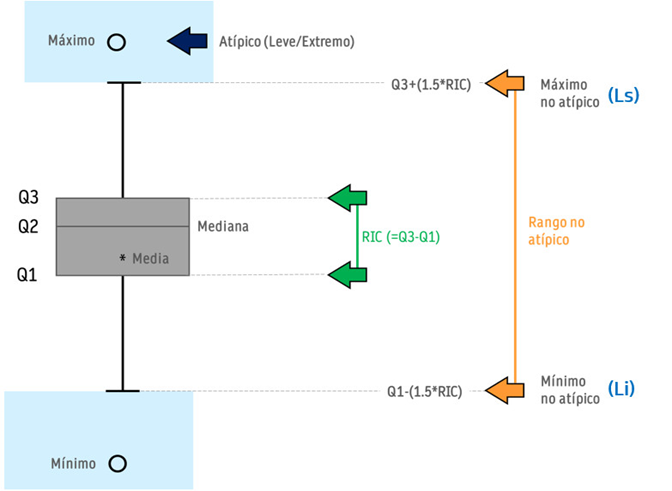

En este Lab se desea desarrollar la estrategia para el tratamiento de datos atípicos.

Imagina que tenemos un DataFrame con las estaturas y los pesos de un conjunto de personas, y que deseas calcular el mínimo no atípico, el máximo no atípico, ver las observaciones con atípicos y con atípicos extremos. Se tienen 4 filas con valores atípicos: 2 son atípicos, y 2 atípicos ex-tremos.

En este Lab se demostrará el uso de diversas técnicas para el manejo de datos atípicos.

Las tareas por realizar son las siguientes:

1.	Crear un DataFrame con atípicos y atípicos extremos.
2.	Calcular el mínimo no atípico, máximo no atípico, y RIC.
3.	Eliminar datos atípicos.
4.	Truncar datos atípicos.
5.	Suavizar atípicos usando transformación logarítmica.
6.	Verificar normalidad usando la prueba Shapiro-Wilk.
7.	Verificar normalidad usando histogramas.
8.	Manejar atípicos usando la técnica de binning.
9.	Manejar atípicos usando técnica de imputación.


## **Crear un DataFrame con atípicos y atípicos extremos**

In [ ]:
import pandas as pd

# Se genera un DataFrame con datos atípicos y atípicos 
# extremos.
datos={
    'estatura_cm':[160,172,180,170,160,169,164,178,174,173,
         166,163,171,180,174,169,160,166,177,175,166,165,179,
         162,173,171,162,161,171,180],
    'peso_kg':[67.80,66.24,88.00,47.20,69.00,65.55,72.96,
         79.56,84.36,69.35,71.28,71.82,81.65,104.83,68.08,
         73.14,53.40,42.05,70.07,67.50,62.70,63.70,81.37,
         62.00,75.19,145.20,65.72,57.95,133.90,76.00]
}

df=pd.DataFrame(datos)

print(df)


## **Calcular el mínimo no atípico, máximo no atípico, y RIC**

In [ ]:
# Se calculan el primer y tercer cuartil, el rango 
# intercuartílico y los máximos y mínimos no atípicos, 
# en su versión regular y extrema.
Q1=df['peso_kg'].quantile(0.25)
Q3=df['peso_kg'].quantile(0.75)

RIC=(Q3-Q1)

Li=Q1-(1.5*RIC)
Ls=Q3+(1.5*RIC)
LiE=Q1-(3.0*RIC)
LsE=Q3+(3.0*RIC)


## **Eliminar datos atípicos**

Genera un nuevo DataFrame llamado **`sin_atípicos`**, donde apliques la estrategia de eliminación de atípicos.

El DataFrame **`sin_atípicos`** solo contendrá filas con valores típicos.

Solo habrá filas donde **`peso_kg`** sea mayor o igual al mínimo no atípico, y menor o igual al máximo no atípico.

El resultado debe contener 26 filas.


In [ ]:
# Se genera un DataFrame que contenga solo las filas donde 
# peso tenga valores típicos.
sin_atípicos = df[(df['peso_kg']>=Li) & (df['peso_kg']<=Ls)]

print(sin_atípicos.shape,'\n')
print(sin_atípicos)


Genera un nuevo DataFrame llamado **`sin_atípicos_extremos`**, donde apliques la estrategia de eliminación de atípicos.

El DataFrame **`sin_atípicos_extremos`** solo contendrá filas con valores típicos y atípicos que no sean extremos.

Solo habrá filas donde **`peso_kg`** sea mayor o igual al mínimo no atípico extremo, y menor o igual al máximo no atípico extremo.

El resultado debe contener 28 filas.


In [ ]:
# Se genera un DataFrame que contenga solo las filas donde 
# peso tenga valores típicos y atípicos no extremos.
sin_atípicos_extremos = df[(df['peso_kg']>=LiE) & 
      (df['peso_kg']<=LsE)]

print(sin_atípicos_extremos.shape,'\n')
print(sin_atípicos_extremos)


## **Truncar datos atípicos**

Genera una nueva columna llamada truncado, donde apliques la estrategia de truncado de atípicos.

Los valores mayores a 100 se truncarán con un valor de **`peso_kg`** igual a 100.

Los valores menores a 50 se truncarán con un valor de **`peso_kg`** igual a 50.

Revisa los registros donde se haya realizado truncado.


In [ ]:
# Se realiza el truncado de datos. Lo que esté por abajo 
# de 50 se ajusta a 50, y todo lo que esté por encima de 
# 100, se ajusta a 100.
df['truncado']=df['peso_kg'].clip(lower=50,upper=100)

# Se muestran las filas que fueron truncadas.
df[['peso_kg','truncado']][(df['peso_kg'] != df['truncado'])]


## **Suavizar atípicos usando transformación logarítmica**

Genera una nueva columna llamada **`logaritmo`**, donde apliques la estrategia de transformación logarítmica de atípicos.

Transforma logarítmicamente el valor de **`peso_kg`** y genera la columna **`logaritmo`** con el valor de la transformación.

Muestra los resultados de la transformación.


In [ ]:
# Se importa la librería pandas, porque se requiere para 
# el trabajo con logaritmos.
import numpy as np

# Se genera un cálculo logarítmico sobre la columna con 
# atípicos. El valor de logaritmo es más suavizado, llevando el valor de peso_kg más cercano a la normalidad.
df['logaritmo']=np.log(df['peso_kg'])

# Se muestran las filas que fueron truncadas.
print(df[['peso_kg','logaritmo']])


## **Verificar normalidad usando la prueba Shapiro-Wilk**

Utiliza la prueba ***Shapiro-Wilk*** para comprobar que la nueva columna ha suavizado las diferencias entre valores, y es más cercana a una distribución normal.

La prueba de normalidad estadística llamada Shapiro-Wilk, que prueba la hipótesis nula de que los datos provienen de una distribución normal.

Si el valor **`p`** de la prueba es menor que un nivel de significancia predeterminado (como 0.05), se rechaza la hipótesis nula y se concluye que los datos no siguen una distribución normal.


In [ ]:
# Se importa la librería scipy, porque se requiere para 
# el trabajo con la pruea Shapiro-Wilk.
from scipy.stats import shapiro

# Realizar la prueba de Shapiro-Wilk, sobre peso_kg y logaritmo
# para comprobar que la transformación hizo tender los datos
# hacia la normalidad.
stat, p_peso = shapiro(df['peso_kg'])
stat, p_logaritmo = shapiro(df['logaritmo'])

# Imprimir el valor p y la conclusión
print(f'Valor p para peso_kg: {p_peso:.8f}')
print(f'Valor p para logaritmo: {p_logaritmo:.8f}')


Dados estos resultados, se puede concluir que la variable **`logaritmo`** es más cercana a una distribución normal que la variable **`peso_kg`**.

Esto se debe a que el valor **`p`** obtenido para la variable logaritmo es mayor que el nivel de significancia estándar de 0.05, lo que significa que no hay suficiente evidencia para rechazar la hipótesis nula de que los datos de la variable logaritmo provienen de una distribución normal.

Por otro lado, el valor **`p`** obtenido para la variable **`peso_kg`** es mucho menor que el nivel de significancia de 0.05, lo que sugiere que la hipótesis nula de normalidad puede ser rechazada en favor de una hipótesis alternativa.


> Es importante tener en cuenta que los valores **`p`** no proporcionan una medida directa de qué tan cerca está una variable de una distribución normal, sino que indican la probabilidad de obtener los datos observados o datos más extremos bajo la hipótesis nula de que los datos provienen de una distribución normal. Por lo tanto, un valor de **`p`** menor indica que es menos probable que los datos provengan de una distribución normal.

## **Suavizar atípicos usando raíz cuadrada**

In [ ]:
# Se genera un cálculo de raíz cuadrada sobre la columna 
# con atípicos. El valor de logaritmo es más suavizado, 
# llevando el valor de peso_kg más cercano a la normalidad.
df['raíz']=np.sqrt(df['peso_kg'])

# Se muestran las filas que fueron truncadas.
print(df[['peso_kg','raíz']])


In [ ]:
# Realizar la prueba de Shapiro-Wilk, sobre peso_kg y raíz
# para comprobar que la transformación hizo tender los datos
# hacia la normalidad.
stat, p_raíz = shapiro(df['raíz'])

# Imprimir el valor p y la conclusión
print(f'Valor p para peso_kg: {p_peso:.8f}')
print(f'Valor p para raíz: {p_raíz:.8f}')


Qué transformación es más efectiva, ¿la logarítmica, o la raíz cuadrada? 

En general, cuanto más grande sea el valor **`p`** obtenido de la prueba, mayor será la evidencia en contra de la hipótesis alternativa de que los datos no provienen de una distribución normal.

Es importante mencionar que Shapiro-Wilk no es una prueba que revise *grados de normalidad*. No podemos argumentar, usando solo Shapiro-Wilk, el grado en que es mejor **`logaritmo`** que **`raíz`**.

Lo que sí podemos decir es que los valores de **`p`** obtenidos para ambas variables (**`raíz`**, **`peso_kg`**) son muy pequeños, lo que sugiere que ambas muestras no provienen de una distribución normal.

En este caso, sí podemos afirmar que **`logaritmo`** nos es más útil, pero sí los resultados hubieran sido diferentes, es decir, que **`raíz`** también fuera lo suficientemente alto como para suponer que provienen de una distribución normal, no sería claro cuál de las dos transformaciones nos es más útil.


## **Verificar normalidad usando histogramas**

In [ ]:
# Se importa la librerías par graficación.
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Histograma de peso_kg 
sns.histplot(df, x='peso_kg', color='blue', 
      alpha=0.5, kde=True)
plt.title('Histograma peso_kg')
plt.show()


In [ ]:
# Histogama de logaritmo
sns.histplot(df, x='logaritmo', color='orange', 
      alpha=0.5, kde=True)
plt.title('Histograma logaritmo')
plt.show()


In [ ]:
# Histogama de raíz
sns.histplot(df, x='raíz', color='red', 
      alpha=0.5, kde=True)
plt.title('Histograma logaritmo')
plt.show()


## **Manejar atípicos usando técnica de binning**

In [ ]:
# Determinamos el mínimo y el máximo.
mínimo=df['peso_kg'].min()
máximo=df['peso_kg'].max()

# Se establecen como límites el mínimo, 
# Li, Ls, y el máximo.
limites=[mínimo,Li,Ls,máximo]

# Se asignan etiquetas para los atípicos arriba y abajo,
# y los típicos.
etiquetas=['ATIPICO BAJO','TÍPICO','ATÍPICO ALTO']

# Se generan las clases de intervalo, considerando los
# límites establecidos, con las etiquetas establecidas,
# e incluyendo el valor menor, para que no se excluye.
df['estado']=pd.cut(df['peso_kg'],
                    bins=limites,
                    labels=etiquetas,
                    include_lowest=True)

print(df[['peso_kg','estado']],'\n')
print(df['estado'].value_counts())


Si no hay atípicos, la lógica se debe cambiar, pues el mínimo estará por encima de **`Li`**, y el máximo estaría por debajo de **`Ls`**, lo que produciría errores.

## **Manejar atípicos usando técnica de imputación**

Genera una nueva columna llamada **`valor_imputado`**, donde apliques la estrategia de imputación de atípicos.

Genera la mediana del **`peso_kg`** sin incluir atípicos. Este valor aplicará como *valor imputado*.

Remplaza los valores atípicos por el valor imputado.

Muestra el resultado.


In [ ]:
# Se calcula la mediana de peso_kg, sin incluir datos atípicos.
mediana=df.loc[(df['peso_kg']>=Li) & 
               (df['peso_kg']<=Ls),'peso_kg'].median()

print("El valor de la mediana (valor imputado) es",
      f"{mediana:.2f}", '\n')

# Se genera una función definida por el usuario, donde se 
# retorne el valor imputado, en lugar 
def imputación(fila):
  valor=fila['peso_kg']
  if (fila['peso_kg']<Li or fila['peso_kg']>Ls):
    valor=mediana
  return valor

df['valor_imputado']=df.apply(imputación,axis=1)

print(df)
